<a href="https://colab.research.google.com/github/yashkaushik02/CodSoft-ML/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spam Detection | **https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.isna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [ ]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='v1'>

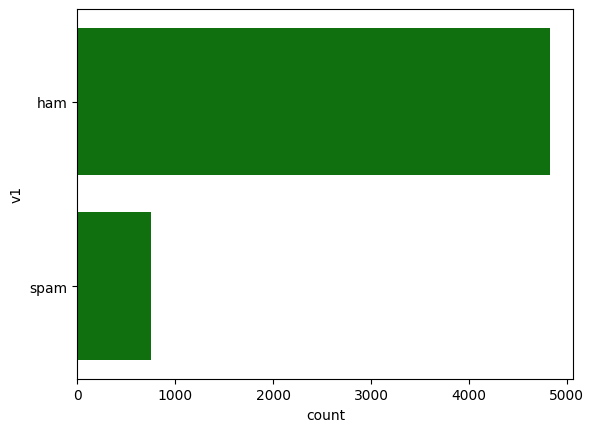

In [ ]:
sns.countplot(data['v1'],color ="Green")

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
lema = WordNetLemmatizer()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stopword = set(stopwords.words("english"))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
import string

In [ ]:
def solution(text):
    text = text.lower()
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stopword and len(i) > 2])
    return text

In [ ]:
data['New_v2'] = data['v2'].apply(solution)
data

,v1,v2,New_v2
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact å£750 pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
data.shape

(5572, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['v1'] = le.fit_transform(data['v1'])

In [ ]:
data

,v1,v2,New_v2
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried contact å£750 pound prize claim...
5568,0,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
data['v1'].shape

(5572,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
idf = TfidfVectorizer()
X = idf.fit_transform(data['New_v2']).toarray()

In [ ]:
X.shape

(5572, 9131)

In [ ]:
y = data['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 39, test_size = 0.2)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
gb = GaussianNB()

In [ ]:
gb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test_pred = gb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Accuracy: \n",accuracy * 100)
print("Confusion Matrix: \n", matrix * 100)

Accuracy: 
 87.89237668161435
Confusion Matrix: 
 [[82600 10900]
 [ 2600 15400]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log = lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
matrix = confusion_matrix(y_test, y_pred_log)

In [ ]:
print("Accuracy: \n",accuracy * 100)
print("Confusion Matrix: \n", matrix * 100)

Accuracy: 
 91.83856502242152
Confusion Matrix: 
 [[93400   100]
 [ 9000  9000]]


In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_model = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_model)
print("Accuracy: ", accuracy * 100)

Accuracy:  95.51569506726457


In [ ]:
model.score(X_test, y_test)

0.9551569506726457